In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
courses = pd.read_csv('Coursera_courses.csv')
reviews = pd.read_csv('Coursera_reviews.csv')

In [3]:
# We merge the two datasets (reviews & courses) based on the column 'course_id' 
# Drop the 'course_url' column
df = pd.merge(reviews, courses, on='course_id') 
#df = df.drop('course_url', 1)

df.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [4]:
# Replace date_reviews column with 'month' and 'year' 
df['year'] = pd.to_datetime(df['date_reviews']).dt.year
df['month'] = pd.to_datetime(df['date_reviews']).dt.month

df = df.drop('date_reviews', 1)

<ipython-input-4-8176cddb2242>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date_reviews', 1)


In [5]:
df.head()

,reviews,reviewers,rating,course_id,name,institution,course_url,year,month
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,2
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,9
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,4
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,2
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,2020,6


In [6]:
df.shape[0]

1454711

In [7]:
# Find out top 10 courses with highest number of reviews
top_reviewed_courses = df.name.value_counts()

In [8]:
top_reviewed_courses.head(10)

Programming for Everybody (Getting Started with Python)                           45218
Machine Learning                                                                  35895
Neural Networks and Deep Learning                                                 35750
Technical Support Fundamentals                                                    35319
Python Data Structures                                                            33546
Learning How to Learn: Powerful mental tools to help you master tough subjects    32265
AI For Everyone                                                                   21630
Excel Skills for Business: Essentials                                             21251
What is Data Science?                                                             21087
The Science of Well-Being                                                         20085
Name: name, dtype: int64

In [9]:
# Find top 10 reviewed courses with institution
top_inst_course = df.groupby(['institution'])['name'].value_counts().sort_values(ascending=False)
top_inst_course.head(10)

institution                         name                                                                          
University of Michigan              Programming for Everybody (Getting Started with Python)                           45218
Stanford University                 Machine Learning                                                                  35895
DeepLearning.AI                     Neural Networks and Deep Learning                                                 35750
Google                              Technical Support Fundamentals                                                    35319
University of Michigan              Python Data Structures                                                            33546
University of California San Diego  Learning How to Learn: Powerful mental tools to help you master tough subjects    32265
DeepLearning.AI                     AI For Everyone                                                                   21630
Macquarie Univers

In [10]:
# Find out top 10 courses with lowest number of reviews
top_reviewed_courses.tail(10)

COVID-19 Contact Tracing For Nursing Professionals             11
The Business of Product Management I                            9
Spanish for Successful Communication in Healthcare Settings     8
Entreprise et changement climatique                             6
Curanderismo: Traditional Healing Using Plants                  6
Social and Economic Networks:  Models and Analysis              6
Introduction to Healthcare                                      6
Entrepreneurship Strategy: From Ideation to Exit                6
Epigenetic Control of Gene Expression                           6
Building Modern Python Applications on AWS                      3
Name: name, dtype: int64

In [11]:
# Find lowest 10 courses with institution
low_inst_course = df.groupby(['institution'])['name'].value_counts().sort_values(ascending=False)
low_inst_course.tail(10)

institution                  name                                                       
University of Houston        COVID-19 Contact Tracing For Nursing Professionals             11
Advancing Women in Product   The Business of Product Management I                            9
Rice University              Spanish for Successful Communication in Healthcare Settings     8
The University of Melbourne  Epigenetic Control of Gene Expression                           6
Stanford University          Social and Economic Networks:  Models and Analysis              6
HEC Paris                    Entrepreneurship Strategy: From Ideation to Exit                6
University of New Mexico     Curanderismo: Traditional Healing Using Plants                  6
Stanford University          Introduction to Healthcare                                      6
ESSEC Business School        Entreprise et changement climatique                             6
Amazon Web Services          Building Modern Python Appl

In [12]:
top_reviewed_courses.index

Index(['Programming for Everybody (Getting Started with Python)',
       'Machine Learning', 'Neural Networks and Deep Learning',
       'Technical Support Fundamentals', 'Python Data Structures',
       'Learning How to Learn: Powerful mental tools to help you master tough subjects',
       'AI For Everyone', 'Excel Skills for Business: Essentials',
       'What is Data Science?', 'The Science of Well-Being',
       ...
       'COVID-19 Contact Tracing For Nursing Professionals',
       'The Business of Product Management I',
       'Spanish for Successful Communication in Healthcare Settings',
       'Entreprise et changement climatique',
       'Curanderismo: Traditional Healing Using Plants',
       'Social and Economic Networks:  Models and Analysis',
       'Introduction to Healthcare',
       'Entrepreneurship Strategy: From Ideation to Exit',
       'Epigenetic Control of Gene Expression',
       'Building Modern Python Applications on AWS'],
      dtype='object', length=603)

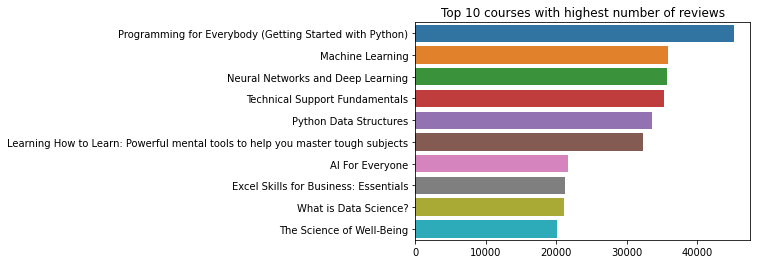

In [15]:
#Plot graph
import seaborn as sns

sns.barplot(x = top_reviewed_courses.head(10).values ,y =top_reviewed_courses.head(10).index)
plt.title("Top 10 courses with highest number of reviews")
plt.savefig("top_10_courses_reviews.png",
                    format='png',dpi=600, bbox_inches='tight')

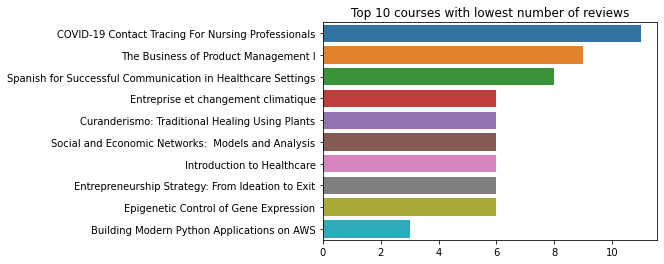

In [16]:
sns.barplot(x = top_reviewed_courses.tail(10).values ,y =top_reviewed_courses.tail(10).index)
plt.title("Top 10 courses with lowest number of reviews")
plt.savefig("bottom_10_courses_reviews.png",
                    format='png',dpi=150, bbox_inches='tight')

In [18]:
# Find top 10 institutions with highest number of reviews 
top_reviewed_institution = df.institution.value_counts()
top_reviewed_institution.head(10)

University of Michigan                167069
DeepLearning.AI                       117029
Google                                 78613
IBM                                    70769
University of Pennsylvania             70531
Stanford University                    63504
University of California San Diego     59589
Johns Hopkins University               57149
Yale University                        51850
Google Cloud                           49285
Name: institution, dtype: int64

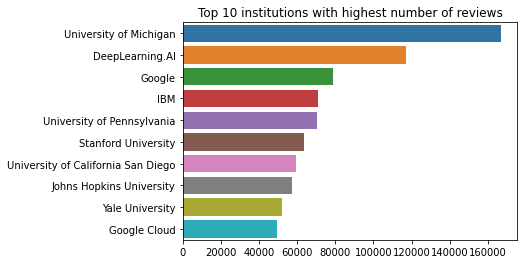

In [19]:
# Plot graph
sns.barplot(x = top_reviewed_institution.head(10).values ,y =top_reviewed_institution.head(10).index)
plt.title("Top 10 institutions with highest number of reviews")
plt.savefig("top_10_institutions_reviews.png",
                    format='png',dpi=150, bbox_inches='tight')

In [20]:
# Find mean rating for institutions
mean_inst_rating = df.groupby(['institution'])['rating'].mean().sort_values(ascending=False)
mean_inst_rating.head(10)

institution
GitLab                               5.000000
UCL School of Management             4.948276
Google - Spectrum Sharing            4.931034
Hebrew University of Jerusalem       4.928451
The University of Chicago            4.921771
Arizona State University             4.912794
University of Rochester              4.908163
Universidad de los Andes             4.906390
Universidade Estadual de Campinas    4.903674
Facebook                             4.886364
Name: rating, dtype: float64

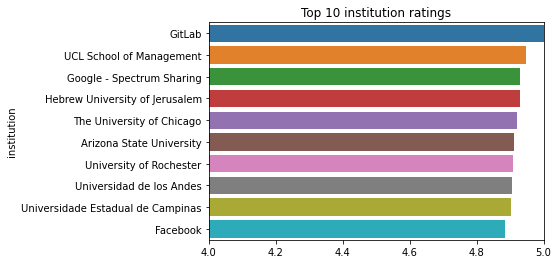

In [32]:
sns.barplot(x = mean_inst_rating.head(10).values ,y =mean_inst_rating.head(10).index)
plt.xlim(4, 5)
plt.title("Top 10 institution ratings")
plt.savefig("top_10_institutions_ratings.png",
                    format='png',dpi=150, bbox_inches='tight')

In [21]:
# Find mean rating for courses
mean_course_rating = df.groupby(['name'])['rating'].mean().sort_values(ascending=False)
mean_course_rating.head(10)

name
Entreprise et changement climatique                                                                5.000000
How to Manage a Remote Team                                                                        5.000000
Removing Barriers to Change                                                                        5.000000
Building Modern Python Applications on AWS                                                         5.000000
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho                           4.968000
Développement psychologique de l'enfant                                                            4.964706
The Horse Course: Introduction to Basic Care and Management                                        4.957364
Build a Modern Computer from First Principles: Nand to Tetris Part II (project-centered course)    4.956989
Bugs 101: Insect-Human Interactions                                                                4.955823
Economics of Money and 

In [22]:
# Find top courses with highest ratings and reviews
count_course = df.groupby(['name'])['rating'].value_counts().sort_values(ascending=False)
count_course.head(10)
#mean_course_rating.append(count_course)

name                                                                            rating
Programming for Everybody (Getting Started with Python)                         5         29732
Technical Support Fundamentals                                                  5         29295
Python Data Structures                                                          5         29160
Neural Networks and Deep Learning                                               5         29103
Machine Learning                                                                5         28485
Learning How to Learn: Powerful mental tools to help you master tough subjects  5         27033
Excel Skills for Business: Essentials                                           5         19356
The Science of Well-Being                                                       5         18987
AI For Everyone                                                                 5         18789
What is Data Science?                            

In [23]:
# Find distribution of reviews by month, year-on-year

def review_counter(year, start_month, end_month):
    
    data = df[(df.year == year) & (df.month >= start_month) & (df.month <= end_month)]
    
    ratings = list(data.groupby(['month']).rating.count())
    
    return ratings

In [24]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'] 

# how many reviews per month from 2016 to 2020? 
reviews_2020 = review_counter(2020, 1, 10)
reviews_2019 = review_counter(2019, 1, 12)
reviews_2018 = review_counter(2018, 1, 12)
reviews_2017 = review_counter(2017, 1, 12)
reviews_2016 = review_counter(2016, 1, 12)

In [25]:
print(reviews_2020, reviews_2019, reviews_2018, reviews_2017, reviews_2016)

[23383, 22712, 33288, 98992, 150382, 126473, 113534, 91980, 77863, 15984] [15658, 16835, 20939, 16465, 18154, 19364, 22788, 23177, 22255, 21947, 20548, 21215] [14016, 15003, 16479, 14196, 13180, 13599, 12035, 12507, 12757, 13333, 12711, 12375] [10335, 8501, 9343, 9255, 12003, 15014, 16064, 18111, 18045, 15871, 14041, 12207] [10749, 12533, 10807, 6746, 6170, 8674, 4785, 7951, 8330, 10737, 10377, 9649]


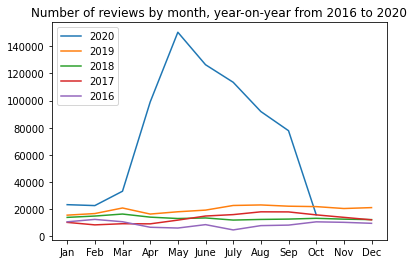

In [26]:
plt.plot(months_2020, reviews_2020)
plt.plot(months, reviews_2019)
plt.plot(months, reviews_2018)
plt.plot(months, reviews_2017)
plt.plot(months, reviews_2016)

plt.legend(['2020', '2019', '2018', '2017', '2016'], loc='upper left')
plt.title("Number of reviews by month, year-on-year from 2016 to 2020")
plt.savefig("reviews_months.png",
                    format='png',dpi=150)

plt.show()

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
#% matplotlib inline

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

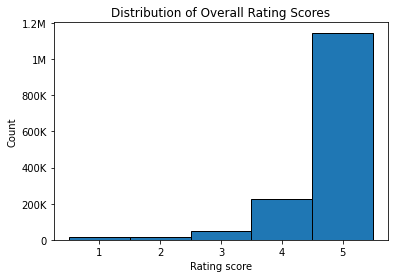

In [28]:
# Distribution of review scores

x = df['rating'].value_counts().index
y = df['rating'].value_counts().values
plt.bar(x, y, fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Rating score'); plt.ylabel('Count'); plt.title('Distribution of Overall Rating Scores');
plt.xticks(list(range(1, 6)));
ax = plt.gca()
ax.bar_label
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

plt.savefig("distribution of rating scores.png",
            format='png',dpi=150)

In [29]:
df['rating'].value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

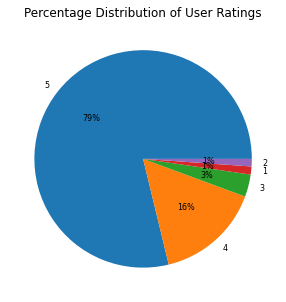

In [41]:
df['rating'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(5,5), fontsize=8)
plt.title("Percentage Distribution of User Ratings")
plt.ylabel("")

plt.savefig("distribution of ratings pie chart.png",
                    format='png',dpi=150, )